<a href="https://colab.research.google.com/github/g8428/TIL/blob/master/220302_nlp_deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/2022-1/국비지원교육/실습폴더/news.csv")

In [ ]:
df = df.dropna()

In [ ]:
df['tokens'] = df['ngrams'].apply(lambda x :  ' '.join([w.split('/')[0] for w in x.split(",")]))
token_list = df['tokens'].tolist()

In [ ]:
len(token_list)

261802

In [ ]:
token_list[:2]

['만기 국채 수익률 fed fed 금리 인상 지속 따르 인플레이션 압력 완화 어렵 전망 인플레이션 제어 반면 만기 국채 수익률 fed 지속 금리 인상 수준 상승 예측 단기 국채 수익률 상승 나타나 반면 장기 국채 수익률 상승 제한 일드커브 플래트닝 가속 덧붙이 고용창출 호조 수입 증가 견인 고용시장 호전 소비자 지출 떠받치 단기 국채 일드커브 인플레이션 fed 고용창출 고용시장 수입 완화',
 '만기 국채 가격 최악 보내 만기 국채 수익률 수준 거래 마감 뉴욕 fed fed 금리 인상 했으나 인플레이션 제어 예상 만기 국채 수익률 소폭 수준 만기 국채 가격 fed 금리 인상 지속 최악 보내 덧붙이 fed 점진적 금리 인상 단행 fed 금리 인상 고용시장 동향 예의 주시 반면 고용창출 건수 호전 fed 공격적 금리 인상 정책 지속 가능성 강조 만기 국채 가격 포인트 오르 가격 움직이 수익률 떨어 만기 국채 수익률 기록 했었 만기 국채 가격 수익률 국채 인상']

In [ ]:
total_token_ls = [tokens.split() for tokens in token_list]
total_token_ls[0]

['만기',
 '국채',
 '수익률',
 'fed',
 'fed',
 '금리',
 '인상',
 '지속',
 '따르',
 '인플레이션',
 '압력',
 '완화',
 '어렵',
 '전망',
 '인플레이션',
 '제어',
 '반면',
 '만기',
 '국채',
 '수익률',
 'fed',
 '지속',
 '금리',
 '인상',
 '수준',
 '상승',
 '예측',
 '단기',
 '국채',
 '수익률',
 '상승',
 '나타나',
 '반면',
 '장기',
 '국채',
 '수익률',
 '상승',
 '제한',
 '일드커브',
 '플래트닝',
 '가속',
 '덧붙이',
 '고용창출',
 '호조',
 '수입',
 '증가',
 '견인',
 '고용시장',
 '호전',
 '소비자',
 '지출',
 '떠받치',
 '단기',
 '국채',
 '일드커브',
 '인플레이션',
 'fed',
 '고용창출',
 '고용시장',
 '수입',
 '완화']

In [ ]:
del df

In [ ]:
del token_list

In [ ]:
!pip install glove-python-binary

In [ ]:
from glove import Corpus, Glove

corpus = Corpus()
#말뭉치에서 동시 등장 행렬, 사전 만들기
corpus.fit(total_token_ls[:1000], window=5)

glove = Glove(no_components=100, learning_rate=0.05)
#corpus.matrix 동시 등장 행렬
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)

Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [ ]:
glove.most_similar("금리")

[('장단기', 0.9361501114365636),
 ('동결', 0.9017963007315121),
 ('부작용', 0.892156468482225),
 ('더이상', 0.8866363511380035)]

In [ ]:
glove.most_similar("인플레이션")

[('억제', 0.8866281452074762),
 ('제어', 0.8489176553048445),
 ('강화', 0.8245931298831677),
 ('관측', 0.8104734384319212)]

In [ ]:
from gensim.models import FastText
model = FastText(total_token_ls[:1000], size=100, window=5, min_count=2, sg=1, iter=100, min_n=3, max_n=6)

[('인하', 0.6190427541732788),
 ('맞췄으며', 0.5863194465637207),
 ('가능성', 0.5653703212738037),
 ('좁혀진', 0.5450276136398315),
 ('정책수단', 0.5426384210586548),
 ('초읽기', 0.536806583404541),
 ('두드려', 0.5318353772163391),
 ('인상', 0.5313268899917603),
 ('접근방법', 0.5271784067153931),
 ('밝힐', 0.5163829326629639)]

In [ ]:
model.wv.most_similar("인플레이션")

[('억제', 0.6456458568572998),
 ('제어', 0.6337130069732666),
 ('fed', 0.6314557790756226),
 ('정책위원회', 0.5940812826156616),
 ('완전고용', 0.5841115117073059),
 ('접근방법', 0.5816026926040649),
 ('인상', 0.5636907815933228),
 ('디플레이션', 0.5589529275894165),
 ('대학', 0.5565709471702576),
 ('건전', 0.544958233833313)]

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [13]:
image = tf.constant([[[[1], [2], [3]], [[4], [5], [6]], [[7], [8], [9]]]], dtype=np.float32)

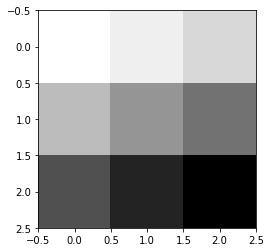

In [14]:
plt.imshow(image.numpy().reshape(3, 3), cmap='Greys')
plt.show()

In [11]:
# 웨이트 생성
weight = np.array([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape

(2, 2, 1, 1)

In [15]:
weight_init = tf.constant_initializer(weight)
# 케라스에서 합성곱 연산을 해줌, 직접 fully connected 안해도 된다
# 아웃풋값 = tf.keras.layers.Conv2d(파라미터)(인풋값)
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='valid', kernel_initializer=weight_init)(image)
conv2d.shape

TensorShape([1, 2, 2, 1])

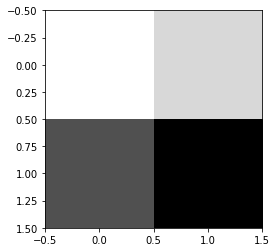

In [16]:
plt.imshow(conv2d.numpy().reshape(2, 2), cmap='Greys')
plt.show()

(1, 3, 3, 1)


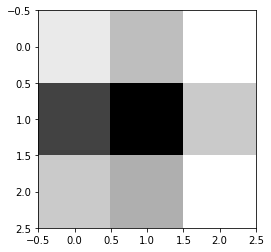

In [18]:
weight_init = tf.constant_initializer(weight)
# 패딩을 same으로 줬을 때,  입력값과 같은 사이즈
conv2d = tf.keras.layers.Conv2D(filters=1, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)
print(conv2d.shape)
plt.imshow(conv2d.numpy().reshape(3, 3), cmap='Greys')
plt.show()

In [20]:
weight = np.array([[[[1., 10, -1]], [[1., 10, -1]]], [[[1., 10, -1]], [[1., 10, -1]]]])
weight_init = tf.constant_initializer(weight)
conv2d = tf.keras.layers.Conv2D(filters=3, kernel_size=2, padding='same', kernel_initializer=weight_init)(image)

feature_maps shape :  (3, 3, 3, 1)


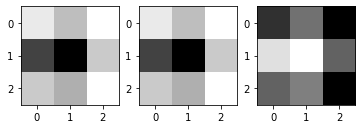

In [21]:
feature_maps = np.swapaxes(conv2d, 0, 3)
print("feature_maps shape : ", feature_maps.shape)

for i, feature_map in enumerate(feature_maps):
    plt.subplot(1, 3, i+1)
    plt.imshow(feature_map.reshape(3, 3), cmap="Greys")
plt.show()

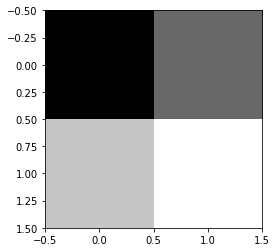

In [22]:
image = tf.constant([[[[4], [3]], [[2], [1]]]], dtype=np.float32)
plt.imshow(image.numpy().reshape(2, 2), cmap='Greys')
plt.show()

In [24]:
# Max Pooling 2D
# 풀 사이즈 =(,), 스트라이드, 패딩 (인풋값)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=1, padding='valid')(image)
print(pool.shape)
print(pool.numpy())

(1, 1, 1, 1)
[[[[4.]]]]


In [38]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [39]:
train_images.shape

(60000, 28, 28)

In [41]:
train_images = train_images/255
test_images = test_images/255

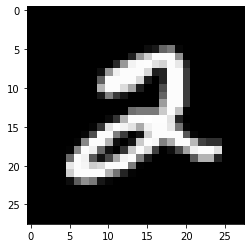

In [40]:
img = train_images[5]
plt.imshow(img, cmap='gray')

In [29]:
img = img.reshape(-1, 28, 28, 1)
img = tf.convert_to_tensor(img)

In [36]:
from warnings import filters
# weight 랜덤 생성
weight_init = tf.keras.initializers.RandomNormal(stddev=0.01) # 표준편차 0.01로 맞출 때 성능up
conv2d = tf.keras.layers.Conv2D(filters=5, kernel_size=(3,3), strides=(2,2), padding='same',
                                kernel_initializer=weight_init)(img)
# filter 수, 커널(웨이트) 사이즈 지정, 패딩, 커널(웨이트)이니셜라이저 = 웨이트데이터

In [37]:
# 패딩은 same size 인데 stride를 2칸으로 줬으니 아웃풋값은 인풋/2
conv2d.shape

TensorShape([1, 14, 14, 5])

In [46]:
# conv2d 결과 디스플레이
def display(conv2d, n, w, h):
    feature_maps = np.swapaxes(conv2d, 0, 3)
    for i , feature_map in enumerate(feature_maps):
        plt.subplot(1, n, i+1)
        plt.imshow(feature_map.reshape(w, h), cmap ='Greys') # 입력값 너비,높이값으로 변형
    plt.show()

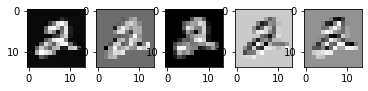

In [47]:
display(conv2d, 5, 14,14)

In [48]:
# 풀링 (최댓값 데이터만 일부 추출)
pool = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same')(conv2d)
pool.shape

TensorShape([1, 7, 7, 5])

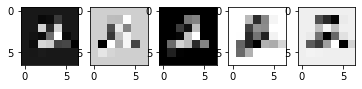

In [49]:
display(pool, 5, 7,7)

In [1]:
# Mnist 데이터 실습
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((-1,28,28,1))
test_images = test_images.reshape((-1,28,28,1))


train_images = train_images/255.
test_images = test_images/255.

valid_images, test_images, valid_labels, test_labels = train_test_split(test_images, test_labels,
                                                                        test_size=0.15,
                                                                        shuffle=True)

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('train_images shape : ', train_images.shape)
print('valid_images shape : ', valid_images.shape)
print('test_images shape : ', test_images.shape)

train_images shape :  (60000, 28, 28, 1)
valid_images shape :  (8500, 28, 28, 1)
test_images shape :  (1500, 28, 28, 1)


In [5]:
# CNN 네트워크 생성
from tensorflow.keras.models import Sequential # 시퀀셜 네트워크
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
# 합성곱, 맥스풀링, 펼쳐주는 함수, 풀리커넥티드 = 덴스

model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', input_shape=(28,28,1))) # 레이어 추가 Conv2D
model.add(MaxPool2D((2,2))) # 레이어 추가 맥스풀링
model.add(Conv2D(64,(3,3),activation='relu')) # 커널 레이어 추가 Conv2D
model.add(MaxPool2D((2,2))) # 레이어 추가 맥스풀링
model.add(Conv2D(64,(3,3),activation='relu')) # 커널 레이어 추가 Conv2D

model.add(Flatten()) # 1차원 데이터로 펼치기
model.add(Dense(64, activation='relu')) # 마지막 활성화함수
model.add(Dense(10, activation='softmax')) # 최종 아웃풋

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

- 파라미터(W) 개수가 320
- Conv2D의 필터 갯수 32개 * (3*3) = 288
- 필터갯수만큼 bias도 자동 추가 + 32 = 320개

- 두번째건 직전 층에서 온 32개를 인풋으로
- 32 * 64 * (3*3) +64 = 18496개

In [9]:
# 같은 함수를 Functional API 로 만들기
import tensorflow as tf
from tensorflow.keras.models import Model # 펑셔널 네트워크
from tensorflow.keras.layers import Input,Conv2D, MaxPool2D, Flatten, Dense

inputs = Input(shape=(28,28,1))
conv1 = Conv2D(32,(3,3),activation='relu')(inputs)
pool1 = MaxPool2D((2,2))(conv1)
conv2 = Conv2D(64,(3,3),activation=tf.nn.relu)(pool1) # 활성함수를 nn으로 넣을 수도 있다
pool2 = MaxPool2D((2,2))(conv2)
conv3 = Conv2D(64,(3,3),activation='relu')(pool2)

flat = Flatten()(conv3)
dense4 = Dense(64, activation='relu')(flat)
outputs = Dense(10, activation='softmax')(dense4)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928 

In [10]:
# 실행
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # loss함수와 optimizer 정해줘야함
              # softmax이니까 loss는 카테고리컬
hist = model.fit(train_images, train_labels,
                 validation_data=(valid_images,valid_labels),
                 epochs=100, batch_size=200) # 오버핏 방지 위해 validation_data 추가

Epoch 1/100
300/300 [==============================] - 5s 14ms/step - loss: 0.3024 - accuracy: 0.9101 - val_loss: 0.0693 - val_accuracy: 0.9780
Epoch 2/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0701 - accuracy: 0.9782 - val_loss: 0.0424 - val_accuracy: 0.9864
Epoch 3/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0482 - accuracy: 0.9853 - val_loss: 0.0433 - val_accuracy: 0.9866
Epoch 4/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0334 - val_accuracy: 0.9880
Epoch 5/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 6/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0250 - accuracy: 0.9922 - val_loss: 0.0316 - val_accuracy: 0.9902
Epoch 7/100
300/300 [==============================] - 4s 13ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0268 - val_accuracy:

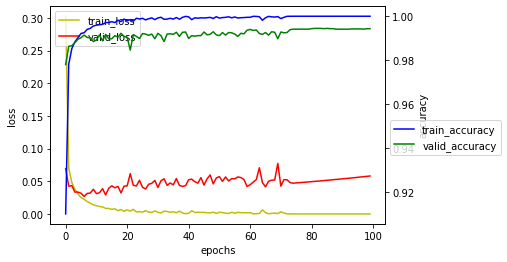

In [11]:
# 그림그려보기
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx() # ax 공유

loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='valid_loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['accuracy'], 'b', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valid_accuracy')
acc_ax.set_xlabel('epochs')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left', bbox_to_anchor=(1,0.5))

plt.show()

# 논문 분석&구현
### yoon kim text classification
#### < Convolutional Neural Networks for Sentence Classification >